### Clustering 
1) k Means Clustering
2) Hierarchical Clustering

Using the Mall dataset, clustering all the customers into meaningful clusters.

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

### Load the Dataset
Check for missing and duplicates

In [165]:
df = pd.read_csv(r"D:\lums\work stuff\notebooks\Week3\Mall_Customers.csv")
df.drop(columns=['CustomerID','Genre'], inplace=True)

df


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### Missing and Duplicates

In [166]:
# Check for missing and duplicate values
df.shape

print("Missing values:\n", df.isnull().sum())
print("\n Duplicate values:", df.duplicated().sum())


Missing values:
 Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 Duplicate values: 0


### Removing Outliers

In [167]:
print("before", df.shape)
def remove_outliers_iqr(df, columns, multiplier=0.8):
    """
    Removes outliers from specified columns in a DataFrame using the IQR method.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to check for outliers.
        multiplier (float): The IQR multiplier (1.5 is standard).
        
    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_cleaned = remove_outliers_iqr(df, df.columns)
print("cleaned:", df_cleaned.shape)
df = df_cleaned


before (200, 3)
cleaned: (175, 3)


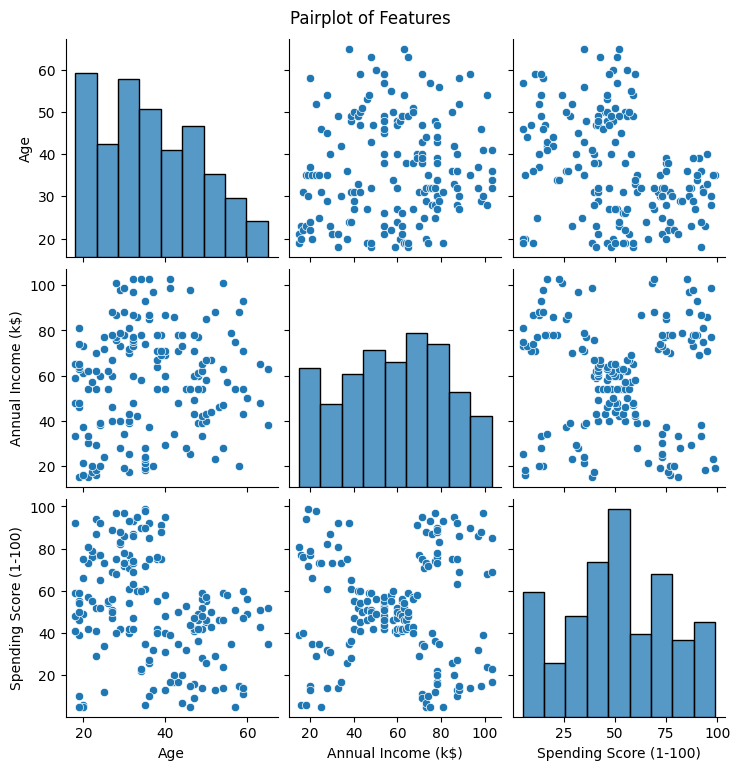

In [168]:
sns.pairplot(df_cleaned)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


### Scaling the Data

In [169]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.440637,-1.853921,-0.508534
1,-1.277564,-1.853921,1.161584
2,-1.359100,-1.811456,-1.820769
3,-1.114490,-1.811456,1.002525
4,-0.462197,-1.768990,-0.468769
...,...,...,...
170,-0.706807,1.798109,0.644643
171,0.353170,1.883040,-1.383358
172,-0.054513,1.883040,1.320643
173,-0.217587,1.883040,-1.144769


### Elbow Method

To find the optimal K value for clustering

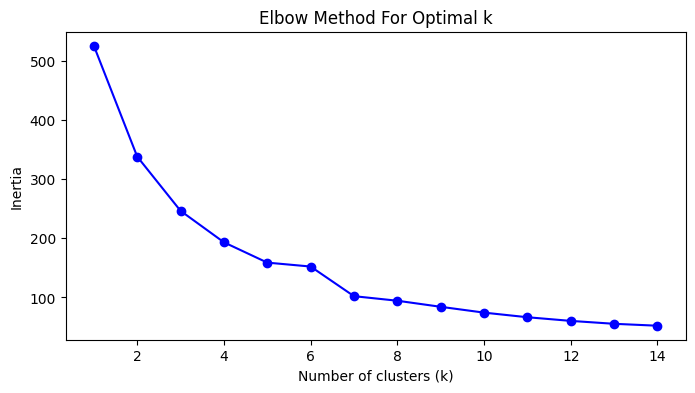

In [170]:
inertia = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### Using Silhouette Scores to see how many clusters to make

In [171]:
def find_best_k_and_pca_dim(X_scaled, k_range=range(2, 11), pca_dims=[2, 3]):
    """
    Loops over combinations of PCA dimensions and cluster counts (k),
    and returns the combo with the best silhouette score.

    Parameters:
        X_scaled: The scaled feature matrix (before PCA).
        k_range: Range of cluster counts to try.
        pca_dims: List of PCA dimensions to reduce to (e.g., [2, 3]).

    Returns:
        A dictionary with best_k, best_dim, best_score, and all_scores.
    """
    best_score = -1
    best_k = None
    best_dim = None
    all_scores = {}

    for d in pca_dims:
        pca = PCA(n_components=d)
        X_pca = pca.fit_transform(X_scaled)

        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            labels = kmeans.fit_predict(X_pca)
            score = silhouette_score(X_pca, labels)
            all_scores[(k, d)] = score
            print(f"PCA dim = {d}, k = {k}, Silhouette Score = {score:.4f}")

            if score > best_score:
                best_score = score
                best_k = k
                best_dim = d

    print(f"\n✅ Best combination: k = {best_k}, PCA dim = {best_dim}, Silhouette Score = {best_score:.4f}")
    return {
        "best_k": best_k,
        "best_dim": best_dim,
        "best_score": best_score,
        "all_scores": all_scores
    }

result = find_best_k_and_pca_dim(df)


PCA dim = 2, k = 2, Silhouette Score = 0.4202
PCA dim = 2, k = 3, Silhouette Score = 0.4420
PCA dim = 2, k = 4, Silhouette Score = 0.3855
PCA dim = 2, k = 5, Silhouette Score = 0.4256
PCA dim = 2, k = 6, Silhouette Score = 0.3767
PCA dim = 2, k = 7, Silhouette Score = 0.3335
PCA dim = 2, k = 8, Silhouette Score = 0.4052
PCA dim = 2, k = 9, Silhouette Score = 0.3779
PCA dim = 2, k = 10, Silhouette Score = 0.3630
PCA dim = 3, k = 2, Silhouette Score = 0.3383
PCA dim = 3, k = 3, Silhouette Score = 0.3722
PCA dim = 3, k = 4, Silhouette Score = 0.3783
PCA dim = 3, k = 5, Silhouette Score = 0.3834
PCA dim = 3, k = 6, Silhouette Score = 0.3655
PCA dim = 3, k = 7, Silhouette Score = 0.4399
PCA dim = 3, k = 8, Silhouette Score = 0.3484
PCA dim = 3, k = 9, Silhouette Score = 0.3449
PCA dim = 3, k = 10, Silhouette Score = 0.3419

✅ Best combination: k = 3, PCA dim = 2, Silhouette Score = 0.4420


In [172]:
pca = PCA(n_components=2)  # you're using 2D PCA now
X_pca = pca.fit_transform(df)  # df should be scaled!
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_pca)


### Observation on Gender

Dropping the gender feature completely gives better clustering when compared to trying to keep gender in as a feature according to the silhouette score

### Visualizing the 2D PCA

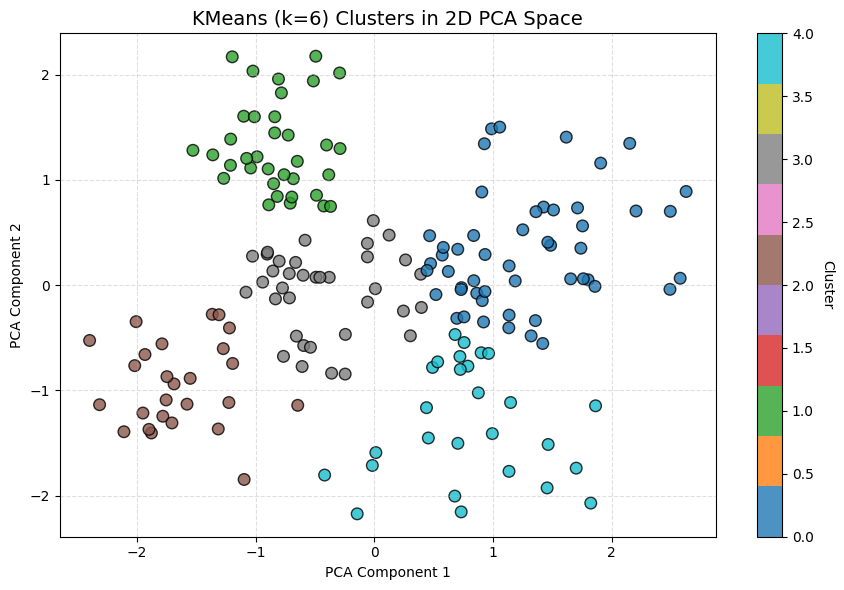

In [ ]:
def plot_2d_clusters(X_pca, labels, title="KMeans Clusters in 2D PCA Space"):
    """
    Plots clusters using precomputed 2D PCA data.

    Parameters:
        X_pca (array): 2D PCA-reduced feature matrix
        labels (array): Cluster labels
        title (str): Plot title
    """
    plt.figure(figsize=(9, 6))
    scatter = plt.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=labels, cmap='tab10', edgecolor='k', s=70, alpha=0.8
    )
    plt.title(title, fontsize=14)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    cbar = plt.colorbar(scatter)
    cbar.set_label("Cluster", rotation=270, labelpad=15)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

plot_2d_clusters(X_pca, labels, title="KMeans (k=5) Clusters in 2D PCA Space")


| Cluster | Name                              | Age Group    | Income    | Spending  | Notes                                                                    |
| ------- | --------------------------------- | ------------ | --------- | --------- | ------------------------------------------------------------------------ |
| **0**   | **Cautious High-Income Adults**   | Older Adults | High      | Low       | Mature, financially strong but cautious in spending. Likely risk-averse. |
| **1**   | **Affluent Young Big Spenders**   | Young Adults | Very High | Very High | Ideal marketing targets for luxury goods and lifestyle brands.           |
| **2**   | **Impulsive Budget Youth**        | Very Young   | Low       | Very High | Possibly students or early earners spending actively.                    |
| **3**   | **Moderate-Earning Young Adults** | Young        | Mid       | Mid       | Balanced behavior, steady targets.                                       |
| **4**   | **Frugal Low-Income Seniors**     | Older Adults | Low       | Low       | Possibly retirees or conservative consumers. Passive group.              |


### Trying to make sense out of the clusters

In [174]:
df_cleaned['Cluster'] = labels
df_cleaned.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

for c in sorted(df_cleaned['Cluster'].unique()):
    print(f"\nCluster {c}")
    print(df_cleaned[df_cleaned['Cluster'] == c][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())



Cluster 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  51.000000           51.000000               51.000000
mean   47.254902           72.882353               32.058824
std    10.256399           15.334467               17.066238
min    19.000000           48.000000                5.000000
25%    41.500000           60.500000               15.500000
50%    48.000000           71.000000               35.000000
75%    54.500000           85.500000               46.500000
max    65.000000          103.000000               59.000000

Cluster 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  35.000000           35.000000               35.000000
mean   32.571429           82.257143               82.171429
std     3.782978           10.213437                9.666454
min    27.000000           69.000000               63.000000
25%    30.000000           74.500000               74.500000
50%    32.000000           78.000000               85.000000
75

### Predicting
Building the Pipeline to be able to predict where a new customer will land

In [175]:
best_k = result['best_k']
best_dim = result['best_dim']

# Re-fit everything using final config
scaler = StandardScaler()
pca_final = PCA(n_components=best_dim)
kmeans_final = KMeans(n_clusters=best_k, random_state=42)

# Fit pipeline
pipeline = make_pipeline(scaler, pca_final, kmeans_final)
pipeline.fit(df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

def predict_new_customer_cluster(pipeline, age, income, score):
    """
    Predict the cluster of a new customer using the trained pipeline.
    
    Parameters:
        pipeline: The trained sklearn pipeline (scaler + PCA + KMeans)
        age, income, score: Features of the new customer

    Returns:
        Cluster label (int)
    """
    new_data = np.array([[age, income, score]])
    return pipeline.predict(new_data)[0]

cluster = predict_new_customer_cluster(pipeline, age=18, income=55, score=90)
print(f"New customer falls in Cluster {cluster}")


New customer falls in Cluster 1


c:\Users\momin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [176]:
joblib.dump(pipeline, 'customer_cluster_pipeline.pkl')
pipeline = joblib.load('customer_cluster_pipeline.pkl')
